In [1]:
import matplotlib.pyplot as plt
from splane import *
import numpy as np
import scipy.signal as sig
from splane import analyze_sys
from scipy import signal
import matplotlib.pyplot as plt
from splane import bodePlot, pzmap
import sympy as sp
import math 

Puedo ver en el gráfico que para w=3 tenemos el cero de transmisión, siendo la transferencia de un Notch pasabajos:

$$T(s) = \frac{s^2 + {w_z}^2}{s^2+s\frac{1}{q}+1}\cdot K$$

Y viendo que la ganancia es nula, K = 1/9 y ${w_z}^2$ = 3 obtengo:

$$T(s) = \frac{1}{3} \cdot \frac{s^2 + 9}{ \left( s^2+ s \frac{1}{q} +1 \right)\cdot(s+3)}$$


In [47]:
all_sys = []
filter_names = []

# No nos da información del Q, así que escogí que Q = 1/sqrt(2) = 
w, s, e = sp.symbols('w s e') # Creamos las variables que usaremos en nuestras funciones.
q = sp.symbols('q', positive=True)
H, f, Dem, p, np, result = sp.symbols('H, f, Dem p np result', cls=sp.Function) # Creamos ls funciones que usaremos.

H = (s**2 + 9) / sp.expand((s**2 + s * 1/q + 1)*(s+3))

#Hw = H.subs({s:sp.I*w})

display(Math('H(s) = \\frac{1}{3} \\cdot'+ sp.latex(H)))


<IPython.core.display.Math object>

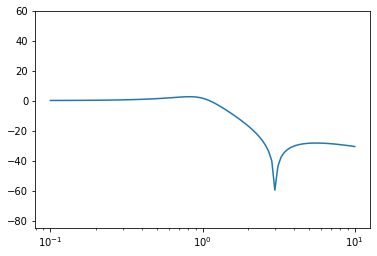

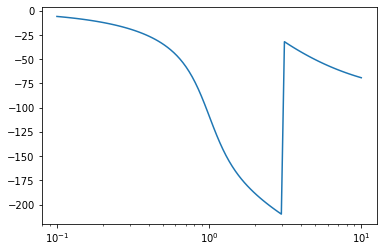

In [48]:
num=[0.333,0,3]
dem=[1,3.707,3.121,3]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-85,60])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

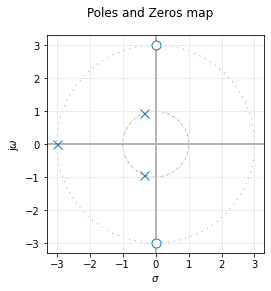

In [49]:
pzmap(sys) # Diagrama de polos y ceros. Función con efectos colaterales.

Aplico el núcleo de tranasformación de pasabajos a pasaltos

In [86]:
H2 = sp.Pow(3, -1) * sp.simplify(H.subs({s:1/s}))
display(Math("H(s)="+sp.latex(H2)))

num, dem = sp.fraction(H2)

dem2 = dem / 3;


numMonic = sp.monic(sp.poly(num),s)
demMonic = sp.monic(sp.poly(dem2),s)

#biquad = 9 * s ** 2 + 1 / 
dem2 = sp.poly(dem2,s)

raices = sp.roots(dem2,multiple=True)

dem3 = ( (s - raices[1]) * (s - raices[2]))

biquad = (9*s**2 + 1) / sp.simplify( (s-raices[1])* (s-raices[2]))
linear = q * s / (s - raices[0])
atenuacion = sp.Pow(3,-1)

display(Math(f" H(s) = {sp.latex(atenuacion)} \cdot {sp.latex(biquad)} \cdot {sp.latex(linear)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

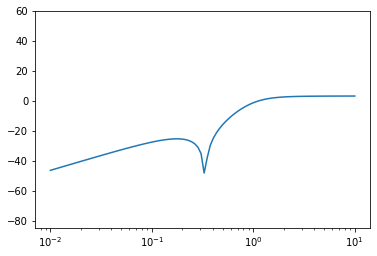

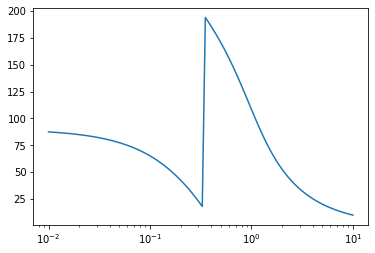

In [87]:
q = 1 / 1.4142
num=[3,0,1/3,0]
dem=[3*q,q+3,3*q+1,q]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-85,60])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()


Para implementarlo separamos:

In [88]:
V_1,V_x, V_y, V_0, s, C, G_1, G_2, G_3 = sp.symbols('V_1 V_x V_y V_0 s C G_1 G_2 G_3', positive = True)

Equation_1 = (V_1-V_x)*G_3 - (V_x-V_0)*s*C
display( Math("0 ="+sp.latex(Equation_1)))
Equation_2 = (V_y-V_x)-(V_x-V_0)
display( Math("0 ="+sp.latex(Equation_2)))
Equation_3 = ((V_1 - V_x)*s*C - V_x*G_1 - (V_x-V_y)*G_2)
display( Math("0 ="+sp.latex(Equation_3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [89]:
Equation_1 = (V_1-V_x)*G_3 - (V_x-V_0)*s*C

Vx = sp.simplify(sp.solve(Equation_1, V_x)[0])
display( Math("V_x ="+sp.latex(Vx)))

Equation_2 = (V_y-Vx)-(Vx-V_0)

Vy = sp.simplify(sp.solve(Equation_2, V_y)[0])
display( Math("V_y ="+sp.latex(Vy)))

Vy = sp.simplify(sp.solve(Equation_2.subs({V_x:Vx}),V_y)[0])

Equation_3 = ((V_1 - Vx)*s*C - Vx*G_1 - (Vx-Vy)*G_2)
H = sp.solve(Equation_3,V_0)[0] / V_1
num, dem = sp.fraction(H)
numMonic = sp.monic(sp.poly(num),s)
demMonic = sp.monic(sp.poly(dem),s)

H = numMonic/demMonic

display( Math("H(s) ="+sp.latex(H)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$$\displaystyle H(s)= \frac{1}{3} \cdot \frac{ q\cdot9\cdot s^{3} + qs}{\left(3 q s^{3} + q s^{2} + 3 q s + q + 3 s^{2} + s\right)}$$